### Web scrapping and Sentiment analysis of customer reviews for British Airways

This work includes of webscrapping customer reviews from https://www.airlinequality.com/airline-reviews/british-airways , using BeautifulSoup package. As we are only interested in British airways reviews we collect only those reviews. After collecting reviews we are analysing if its a positive or negtive or neutral review for airline using NLP sentiment analysis.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 200

reviews = []

#iterarting to get 200 reviews in each page
for page in range(1, pages + 1):

    print(f"Scraping page {page}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{page}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 200 total reviews
Scraping page 2
   ---> 400 total reviews
Scraping page 3
   ---> 600 total reviews
Scraping page 4
   ---> 800 total reviews
Scraping page 5
   ---> 1000 total reviews
Scraping page 6
   ---> 1200 total reviews
Scraping page 7
   ---> 1400 total reviews
Scraping page 8
   ---> 1600 total reviews
Scraping page 9
   ---> 1800 total reviews
Scraping page 10
   ---> 2000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Another BA Shambles. Starte...
1,Not Verified | BA cancelled my flight home to...
2,"Not Verified | BA cancelled my flight home, t..."
3,✅ Trip Verified | Turned up 3.5 hours in advan...
4,Not Verified | Boarding – at gate at LGW they...


From above, we can notice that 2000 reviews for british airways has been collected. However this is completely raw data and we need to clean data. For example Trip Verified, Not Verified might not be necessary in our data, so we need to remove those parts from the data. 

In [5]:
#to remove the content before '|' in the reviews
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,Another BA Shambles. Started off well with e...
1,BA cancelled my flight home to Heathrow on D...
2,"BA cancelled my flight home, the last flight..."
3,"Turned up 3.5 hours in advance, Terminal 5 at..."
4,Boarding – at gate at LGW they called Group ...
...,...
1995,London to Paris CDG in business class. Briti...
1996,Every airline which offers Business Class Tr...
1997,None
1998,Amsterdam to Sao Paulo via London Heathrow w...


#### For performing Sentiment Analysis, we use Lexicon Based Approach.We do not use Machine learning models for this approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.



#### Data preprocessing steps:
1) Cleaning the text
2) Tokenization
3) Enrichment – POS tagging
4) removal of Stopwords
5) Obtaining the stem words

### Cleaning text

In [8]:
import re

# Define a function to clean the text
def clean_text(review):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z+]', ' ', str(review))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean_text)
df.head()

,reviews,Cleaned Reviews
0,Another BA Shambles. Started off well with e...,Another BA Shambles Started off well with e...
1,BA cancelled my flight home to Heathrow on D...,BA cancelled my flight home to Heathrow on D...
2,"BA cancelled my flight home, the last flight...",BA cancelled my flight home the last flight...
3,"Turned up 3.5 hours in advance, Terminal 5 at...",Turned up hours in advance Terminal at...
4,Boarding – at gate at LGW they called Group ...,Boarding at gate at LGW they called Group ...


In [9]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Sandeep
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Sandeep
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Sandeep
[nltk_data]     kumar\AppData\Roaming\nltk_data...


Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

In [10]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    #tokenizing words and pos tagging
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
              newlist.append(tuple([word, pos_dict.get(tag[0])]))
              #print(tag[0])
              #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Sandeep
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sandeep kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Another BA Shambles. Started off well with e...,Another BA Shambles Started off well with e...,"[(Another, None), (BA, n), (Shambles, n), (Sta..."
1,BA cancelled my flight home to Heathrow on D...,BA cancelled my flight home to Heathrow on D...,"[(BA, n), (cancelled, v), (flight, n), (home, ..."
2,"BA cancelled my flight home, the last flight...",BA cancelled my flight home the last flight...,"[(BA, n), (cancelled, v), (flight, n), (home, ..."
3,"Turned up 3.5 hours in advance, Terminal 5 at...",Turned up hours in advance Terminal at...,"[(Turned, v), (hours, n), (advance, a), (Termi..."
4,Boarding – at gate at LGW they called Group ...,Boarding at gate at LGW they called Group ...,"[(Boarding, v), (gate, n), (LGW, n), (called, ..."


###  Obtaining Stem Words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [13]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Another BA Shambles. Started off well with e...,Another BA Shambles Started off well with e...,"[(Another, None), (BA, n), (Shambles, n), (Sta...",Another BA Shambles Started well excellent c...
1,BA cancelled my flight home to Heathrow on D...,BA cancelled my flight home to Heathrow on D...,"[(BA, n), (cancelled, v), (flight, n), (home, ...",BA cancel flight home Heathrow Dec th face s...
2,"BA cancelled my flight home, the last flight...",BA cancelled my flight home the last flight...,"[(BA, n), (cancelled, v), (flight, n), (home, ...",BA cancel flight home last flight day Heathr...
3,"Turned up 3.5 hours in advance, Terminal 5 at...",Turned up hours in advance Terminal at...,"[(Turned, v), (hours, n), (advance, a), (Termi...",Turned hour advance Terminal London Heathrow...
4,Boarding – at gate at LGW they called Group ...,Boarding at gate at LGW they called Group ...,"[(Boarding, v), (gate, n), (LGW, n), (called, ...",Boarding gate LGW call Group board World Tra...


### Sentiment analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [14]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Another BA Shambles. Started off well with e...,Another BA Shambles Started off well with e...,"[(Another, None), (BA, n), (Shambles, n), (Sta...",Another BA Shambles Started well excellent c...,0.9747,Positive
1,BA cancelled my flight home to Heathrow on D...,BA cancelled my flight home to Heathrow on D...,"[(BA, n), (cancelled, v), (flight, n), (home, ...",BA cancel flight home Heathrow Dec th face s...,-0.9062,Negative
2,"BA cancelled my flight home, the last flight...",BA cancelled my flight home the last flight...,"[(BA, n), (cancelled, v), (flight, n), (home, ...",BA cancel flight home last flight day Heathr...,-0.5070,Negative
3,"Turned up 3.5 hours in advance, Terminal 5 at...",Turned up hours in advance Terminal at...,"[(Turned, v), (hours, n), (advance, a), (Termi...",Turned hour advance Terminal London Heathrow...,-0.6369,Negative
4,Boarding – at gate at LGW they called Group ...,Boarding at gate at LGW they called Group ...,"[(Boarding, v), (gate, n), (LGW, n), (called, ...",Boarding gate LGW call Group board World Tra...,0.9678,Positive


In [16]:
analysis_counts = df['Analysis'].value_counts()
analysis_counts

Positive    988
Negative    663
Neutral     349
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x180be712df0>,
 [Text(0.02073332569917292, 1.0998045868268838, 'Positive'),
  Text(-0.5908677296016367, -0.9278336737343647, 'Negative'),
  Text(1.0454882506951315, -0.6384193901021759, 'Neutral')],
 [Text(0.01130908674500341, 0.599893410996482, '49.4%'),
  Text(-0.32229148887361997, -0.5060910947641988, '33.1%'),
  Text(0.6187583524522206, -0.37784004720332853, '17.5%')])

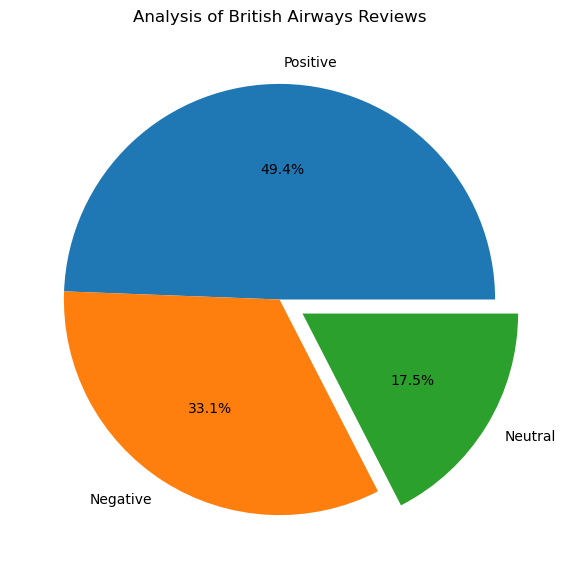

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

#plt.subplot(1,1,1)
plt.title("Analysis of British Airways Reviews")
plt.pie(analysis_counts.values, labels = analysis_counts.index, explode = (0, 0, 0.125), autopct='%1.1f%%', shadow=False)

In [24]:
df.to_csv("BA_reviews.csv")

### Word count

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00


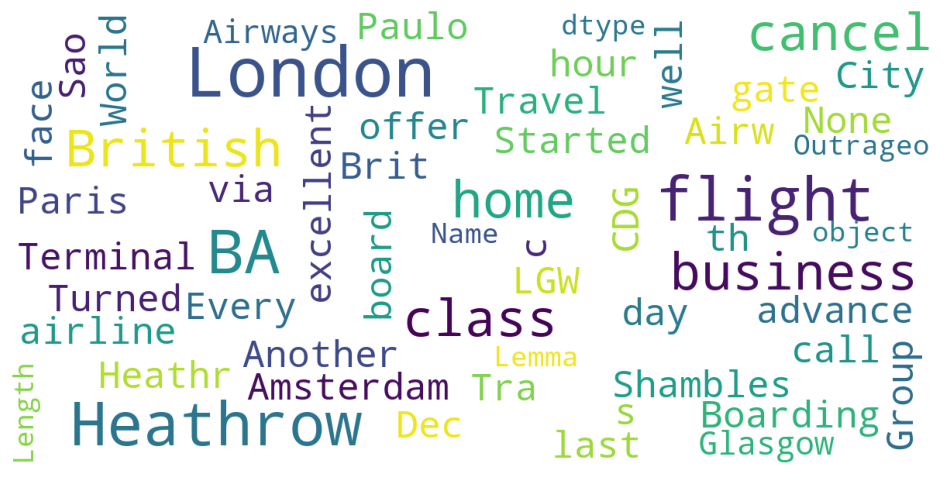

In [26]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)